# ModSim Project 1

Maya Al-Ahmad and Annie Tor

In [362]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# import function that will let us read in our data
from pandas import read_csv

# reading in the data, putting it as table
filename = r'C:\Users\ator\Desktop\ModSim\ModSimProject1Data.csv'
table = read_csv(filename, header=0, index_col=0);

## What would've happened to China's population if the one-child policy was never instated?

In 1979, the Chinese government introduced a radical law that limited families to having only one child. This rule, known as the one-child policy, was an extreme attempt at radically cutting down China's fast-growing population. The one-child policy existed in many forms and variations until 2016.

The goal of this project is to predict what might have happened to China's population if it had never established the one-child policy. To do this, we created models based off population data from 1960 to 2017 from the World Bank. In our models, we attempted to fit population growth from 1960 through 1979 (when the policy was introduced) and then continued the growth we observed from then for 1980 through 2016.

Here's the data as a table. We'll only be using the population total, the birth rates, and the death rates for this project.

In [364]:
table

,"Life expectancy at birth, total (years)","Population, male (% of total)","Population, male","Population, female (% of total)","Population, female","Population, total","Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, adult, female (per 1,000 female adults)",Sex ratio at birth (male births per female births)
Year,,,,,,,,,,,
1960,43.725,51.544741,343839501,48.455259,323230499,667070000,25.43,20.86,499.659,397.316,NaN
1961,44.051,51.516616,340179667,48.483384,320150333,660330000,14.24,18.02,497.798,396.271,NaN
1962,44.783,51.492137,342819197,48.507863,322950803,665770000,10.02,37.01,495.937,395.226,1.070
1963,45.972,51.469899,351197134,48.530101,331137866,682335000,10.04,43.37,459.408,371.219,NaN
1964,47.592,51.448006,359289719,48.551994,339065281,698355000,11.50,39.14,422.879,347.213,NaN
1965,49.549,51.425395,367786712,48.574605,347398288,715185000,9.50,37.88,386.349,323.206,NaN
1966,51.696,51.401772,378008633,48.598228,357391367,735400000,8.83,35.05,349.820,299.200,NaN
1967,53.847,51.378155,387673867,48.621845,366876133,754550000,8.43,33.96,313.291,275.193,1.070
1968,55.843,51.356285,397759563,48.643715,376750437,774510000,8.21,35.59,297.064,257.750,NaN


We'll rename the column names for the sake of brevity. We'll also be converting the population totals into billions and the birth and death rates into percentages for the same reason.

In [367]:
table.columns = ['lebt', 'popmp', 'popm', 'popfp', 'popf', 'popt', 'death', 'birth', 'mortm', 'mortf', 'sex']
popt = table.popt / 1e9;
death_rate = table.death / 1000;
birth_rate = table.birth / 1000;

Now, we'll establish some common variables that we'll use throughout the notebook. These variables include the year our data starts, the year the one-child policy was introduced, the year the one-child policy was ended, the populations at all these times, and the growth rates.

In [369]:
t_0 = get_first_label(popt);
t_ocp = 1979; 
t_end = 2016;
p_0 = popt[t_0];
p_ocp = popt[t_ocp];
p_end = popt[t_end];
growth_rate = birth_rate - death_rate;

## Linear Growth Model

For the linear growth model, we'll use the average growth per year from 1960 to 1979 to simulate the growth of the population if it hadn't been affected by the one-child policy.
First, we find the average growth (in number of births - deaths) per year from 1960-1979, before the one-child policy was enacted.

In [370]:
growth = (popt[t_ocp] - popt[t_0]) / (t_ocp - t_0)

0.01589131578947368

Now we establish the system and its parameter.

In [388]:
system = System(t_0 = t_0,
                t_ocp = t_ocp,
                t_end = t_end,
                p_0 = p_0,
                p_end = p_end,
                growth = growth);

For the update function, we're just going to add the average growth per year to the previous year.

In [389]:
def linear(pop, t, system):
    return pop + system.growth;

Our simulation function runs the update function through each year and then puts our model outputs into a TimeSeries so we can plot it. We'll be using this same function for all the other types of models we test.

In [391]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

Lastly, we run and then plot the model.

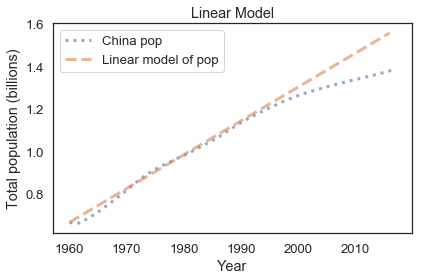

In [392]:
results = run_simulation(system, linear)

plot(popt, ':', label='China pop')
plot(results, '--', label='Linear model of pop')

decorate(title= 'Linear Model',
         xlabel='Year',
         ylabel='Total population (billions)')

# Proportional Growth Model

For the proportional growth model, we'll use the average growth rate per year from 1960 to 1979 to simulate the growth of the population if it hadn't been affected by the one-child policy. Unlike the last model, the proportional growth model accounts for the fact that larger populations will grow more, instead of at a constant rate. First, we find the average growth rate per year from 1960-1979, before the one-child policy was enacted. It's important to note that the last model used average growth, and this model uses average growth *rate*.

In [396]:
def find_avg(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    growth_total = 0

    for t in linrange(system.t_0, system.t_ocp):
        growth_total = system.growth_rate[t] + growth_total
    
    return growth_total/(system.t_ocp - system.t_0)

Now we establish the system and its parameter, like we did in the last model.

In [397]:
avg_gr = find_avg(system2)

system2 = System(t_0=t_0,
                t_end=t_end,
                t_ocp=t_ocp,
                p_0=p_0,
                p_end=p_end,
                growth_rate=growth_rate,
                avg_gr = avg_gr);   

For the update function, we're just going to multiply the average growth rate per year by the population that year, then add it back to the population. Before 1979, we'll use the actual growth rates per year, and after 1979, we'll use the average growth rate we found earlier.

In [399]:
def prop(pop, t, system):
    if (t <= 1979): 
        growth = growth_rate[t] * pop
        return pop + growth
    else: 
        growth = avg_gr * pop
        return pop + growth

Lastly, we run and then plot the model. We're using the same simulation function as with the linear model.

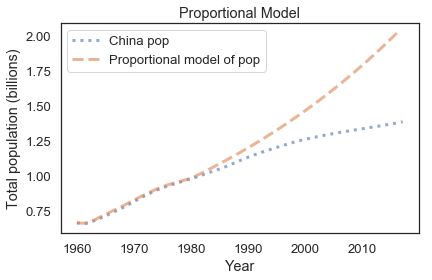

In [402]:
results = run_simulation(system, prop)

plot(popt, ':', label='China pop')
plot(results, '--', label='Proportional model of pop')
decorate(title= 'Proportional Model',
         xlabel='Year',
         ylabel='Total population (billions)')

# Quadratic Growth Model

For the quadratic growth model, we'll use the two parameters, alpha and beta, to simulate the growth of the population if it hadn't been affected by the one-child policy. Unlike the previous models, the quadratic growth model accounts for the fact that one day, population growth will be forced to slow because of a lack of resources or space. First, we establish the system and the numbers we've chosen for alpha and beta. The number we've chosen for alpha is 0.022 and beta is -0.0015, which means that our predicted carrying capacity for this model is 14.67 billion people. 

In [406]:
system3 = System(t_0=t_0,
                t_end=t_end,
                t_ocp=t_ocp,
                p_0=p_0,
                p_end=p_end,
                alpha = 0.022,
                beta = -0.0015);

Now for the update function. We're just going to multiply alpha by the population, and add that to beta multiplied by the population squared.

In [407]:
def quad(pop, t, system):
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop +net_growth

Lastly, we run and then plot the model.

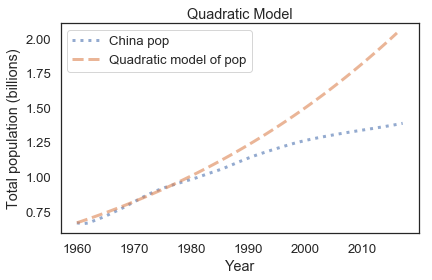

In [410]:
results = run_simulation(system3, quad)

plot(popt, ':', label='China pop')
plot(results, '--', label='Quadratic model of pop')
decorate(title= 'Quadratic Model',
         xlabel='Year',
         ylabel='Total population (billions)')

## Interpretation


China’s one child policy was never truly a one child policy. The actual number of children allowed fluctuated between 1979 and 2016 (when the policy was introduced and ended respectively). Certain people could also have more children – ethnic minorities were allowed two, and farmers could have a second child, provided that first child was a girl. The policy was also not equally enforced, and those in cities often felt its effects most strongly. All that being said, the Chinese government estimates that about 400 million births were prevented thanks to the policy, which was an attempt to curb overpopulation. Did it work?

For the purposes of this project, we decided to assume that the death rate would be proportional to the birth rate. In reality, this may not have been true at all. We also ignored the existence of the two child policy, (from 1970 to 1979, and re-implemented in 2016), as it wasn’t enforced. Additionally, we treated the one-child policy as if it had truly been a purely one-child policy, ignoring its many variations.

In this project, we tested three different types of models: linear, proportional, and quadratic. This was so we could find the model type that best fit the data from 1960 to 1979, thus giving us the most accurate prediction for the years following.
Interestingly, the linear model seemed to fit the data incredibly well from the 1980s to the 1990s. Perhaps this was the time when the one child policy was best enforced, making the growth most linear. Maybe it’s just a coincidence. Regardless, populations don’t grow linearly, which is why this model was ruled out immediately.

The proportional model fits the data well, and seems to follow realistic growth after the real plot and the model diverge. However, it assumes that the population will continue to grow proportionally forever, ignoring the fact that space and resources are finite.

In the end, we decided the most accurate model was the Quadratic model. It fit the data well, and a quadratic model projects an eventual plateau in the growth rate, which logically makes sense (at some point, China will run out of resources and ways to create new ones, meaning that population growth will be forced to slow). This model, like the Proportional model, predicts a dramatically larger population than what China currently has. According to our model, had the one child policy never been implemented, China’s population would be about 2 billion in 2016. The actual population of China in 2016 was 1.4 billion.
As a result of the one-child policy, China was able to curb their population growth significantly.